# EDA Notebook

### Introduction

**Business Problem**

XYZ, a private firm in the U.S., is exploring an investment in the cab industry due to its rapid growth. The firm is considering two competing cab companies and wants to make a data-driven decision on which company would be the better investment opportunity.

The key questions we aim to answer in this analysis are:
-  __Which cab company dominates the highest number of major cities?__
- __Which cab company has a majority market share__
- __How does the Revenue from the Cab companies vary with time__

**Objective**

To support XYZ’s investment decision, we will analyze multiple datasets to:

Compare market share of both cab companies.
Identify trends in customer usage and city-wise dominance.
Provide actionable insights on which company has a stronger presence.

**Data Understanding**

| Names of Collumns       | Description                      |
|------------------|--------------------------------|
| Transaction ID   | Unique ID for each transaction |
| Customer ID      | Links transaction to customer  |
| City            | City where ride occurred       |
| Price           | Price of Trip           |
| Payment_Mode     | How the Customer paid for the trip |
| Comapany | Which company was used for the trip |
| KM Traveled | Distance of the trip in Kilometer|
| Cost Charged | How much the Customer paid|
| Age | Age of Customer|
|Gender | Gender of Customer|
|Population| Population of the city |

**The Datasets**

We have been provided with four datasets, each covering different aspects of the cab industry. Below is a description of each dataset:
| Names of Dataset      | Whats Included                     |
|------------------|--------------------------------|
| Cab_Data.csv | Unique Transaction ID, Date, Company, City, Price and Cost |
| City.csv     | Name of city, Population of City, # of users in city  |
| Customer_ID.csv          | Unique Customer ID, Gener, Age and Income    |
| Transaction_ID.csv         | Unique Transaction ID, Unique Customer ID, and Payment_Mode       |


**Relationships between Data Sets**

Each dataset connects through common identifiers, allowing us to merge them into a master dataset for analysis.
Primary Key Relationships:

-  Transaction ID connects Cab_Data.csv and Transaction_ID.csv.
-  Customer ID connects Transaction_ID.csv and Customer_ID.csv.
-  City serves as a common field in Cab_Data.csv and City.csv.

### The Data Analysis

**First Steps**

-  Importing Pandas as pd
-  reading the data sets to see what we're working with

In [9]:
import pandas as pd
cab_data = pd.read_csv("Cab_Data.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")

# Inspect the first few rows
cab_data.head(), customer_data.head(), transaction_data.head(), city_data.head()

(   Transaction ID  Date of Travel   Company        City  KM Travelled  \
 0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
 1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
 2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
 3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
 4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
 
    Price Charged  Cost of Trip  
 0         370.95       313.635  
 1         358.52       334.854  
 2         125.20        97.632  
 3         377.40       351.602  
 4         114.62        97.776  ,
    Customer ID Gender  Age  Income (USD/Month)
 0        29290   Male   28               10813
 1        27703   Male   27                9237
 2        28712   Male   53               11242
 3        28020   Male   23               23327
 4        27182   Male   33                8536,
    Transaction ID  Customer ID Payment_Mode
 0        10000

##### *We begin merging the data sets together to create a master data set to make data analysis easier. We use the shared collumns as stated before*

In [10]:
cab_transactions = pd.merge(transaction_data, cab_data, on= "Transaction ID" , how="inner")

In [12]:
master_data = pd.merge(cab_transactions, customer_data, on= "Customer ID", how= "inner")

In [13]:
master_data = pd.merge(master_data, city_data, on="City", how="left")

In [14]:
# Check for missing values
print(master_data.isnull().sum())

# Check dataset shape
print(master_data.shape)

# Preview the dataset
master_data.head()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64
(359392, 14)


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701"
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701"
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701"
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701"
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,"814,885","24,701"


#### *Hypothesis 1: Which country dominates the higher amount of major US Cities*

In [16]:
# Group by City and Company, then sum relevant metrics (total rides & total revenue)
city_company_stats = master_data.groupby(["City", "Company"]).agg(
    total_rides=("Transaction ID", "count"),  # Count transactions
    total_revenue=("Price Charged", "sum")  # Sum total fare amount
).reset_index()

# Sort by total_rides to see which company dominates in each city
city_company_stats.sort_values(["City", "total_rides"], ascending=[True, False], inplace=True)

# Display the first few rows
city_company_stats.head()

,City,Company,total_rides,total_revenue
1,ATLANTA GA,Yellow Cab,5795,2447885.92
0,ATLANTA GA,Pink Cab,1762,532355.80
3,AUSTIN TX,Yellow Cab,3028,1278569.79
2,AUSTIN TX,Pink Cab,1868,598572.71
5,BOSTON MA,Yellow Cab,24506,8801095.40


In [17]:
# Find the company with the max rides per city
dominant_company_per_city = city_company_stats.loc[city_company_stats.groupby("City")["total_rides"].idxmax()]

# Count how many cities each company dominates
company_dominance = dominant_company_per_city["Company"].value_counts()

# Display results
print(company_dominance)

Company
Yellow Cab    15
Pink Cab       4
Name: count, dtype: int64


##### *Now to visualize the graph by importing matplotlib*

Company
Yellow Cab    15
Pink Cab       4
Name: count, dtype: int64


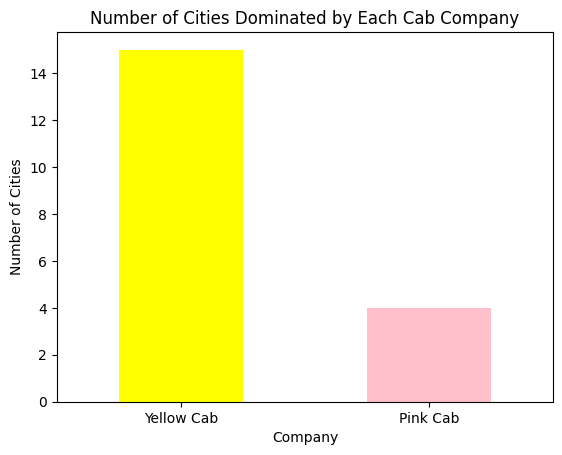

In [20]:
# Count the number of cities each company dominates
company_dominance = dominant_company_per_city["Company"].value_counts()

# Display the results
print(company_dominance)

# Visualization
import matplotlib.pyplot as plt

company_dominance.plot(kind="bar", color=["yellow", "pink"])
plt.title("Number of Cities Dominated by Each Cab Company")
plt.xlabel("Company")
plt.ylabel("Number of Cities")
plt.xticks(rotation=0)
plt.show()

#### *Hypothesis 2: Which Cab Company has a Larger Market Share*

##### **Define Market Share**
Market share can be measured in multiple ways, including:
-  Total number of rides per company
-  Total revenue per company
-  Proportion of total transactions for each company

If one cab company consistently has more rides and revenue, it indicates higher market share.

##### **Data Preparation**
We'll need to extract and summarize key metrics from Cab_Data.csv:

- Company (which cab company provided the ride)
- Price (fare amount per ride)
- Transaction ID (unique ride count)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cab data
cab_data = pd.read_csv("Cab_Data.csv")

# Summarize market share
market_share = cab_data.groupby("Company").agg(
    Total_Rides=("Transaction ID", "count"),  # Count of transactions (rides)
    Total_Revenue=("Price Charged", "sum")  # Sum of all fares per company
).reset_index()

# Calculate percentage share
market_share["Ride_Share (%)"] = (market_share["Total_Rides"] / market_share["Total_Rides"].sum()) * 100
market_share["Revenue_Share (%)"] = (market_share["Total_Revenue"] / market_share["Total_Revenue"].sum()) * 100

# Display the summary
print(market_share)

      Company  Total_Rides  Total_Revenue  Ride_Share (%)  Revenue_Share (%)
0    Pink Cab        84711   2.632825e+07       23.570642          17.300487
1  Yellow Cab       274681   1.258539e+08       76.429358          82.699513


##### *Now to visulaize the data*

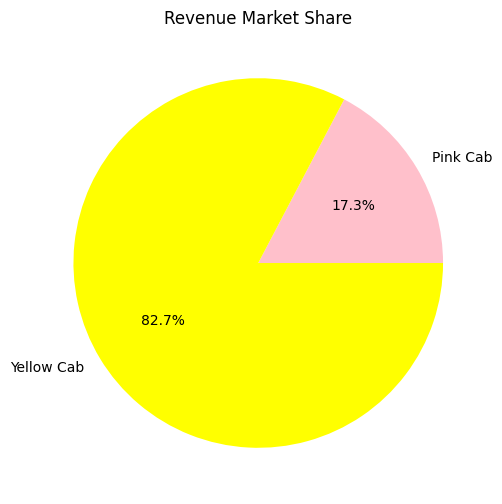

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(market_share["Revenue_Share (%)"], labels=market_share["Company"], autopct='%1.1f%%', colors=["Pink", "Yellow"])
plt.title("Revenue Market Share")
plt.show()

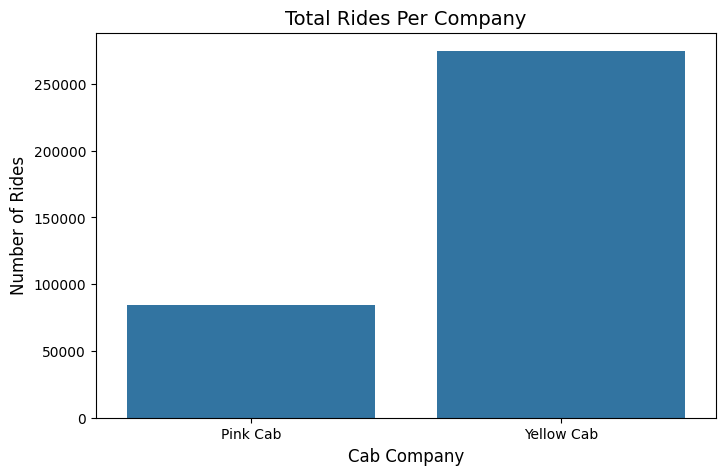

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x=market_share["Company"], y=market_share["Total_Rides"])
plt.title("Total Rides Per Company", fontsize=14)
plt.xlabel("Cab Company", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.show()

#### *Hypothesis 3: How does Cab Company revenue vary with time*

In [21]:
import pandas as pd

# Load the Cab Data
cab_data = pd.read_csv("Cab_Data.csv")

# Display the first few rows to understand the structure
print(cab_data.head())
# Convert 'Date of Travel' from Excel serial number to datetime
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"], origin="1899-12-30", unit="D")

# Check if conversion worked
print(cab_data[["Date of Travel"]].head())
# Extract Year-Month for analysis
cab_data["YearMonth"] = cab_data["Date of Travel"].dt.to_period("M")

# Aggregate total revenue per month
revenue_trend = cab_data.groupby("YearMonth").agg(
    Total_Revenue=("Price Charged", "sum")  # Summing up revenue per month
).reset_index()

# Convert period format to string for proper plotting
revenue_trend["YearMonth"] = revenue_trend["YearMonth"].astype(str)

# Display the first few rows
print(revenue_trend.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
  Date of Travel
0     2016-01-08
1     2016-01-06
2     2016-01-02
3     2016-01-07
4     2016-01-03
  YearMonth  Total_Revenue
0   2016-01     2257386.53
1   2016-02     2742751.39
2   2016-03     2861770.09
3   2016-04     2938924.63
4   2016-05     3493509.29


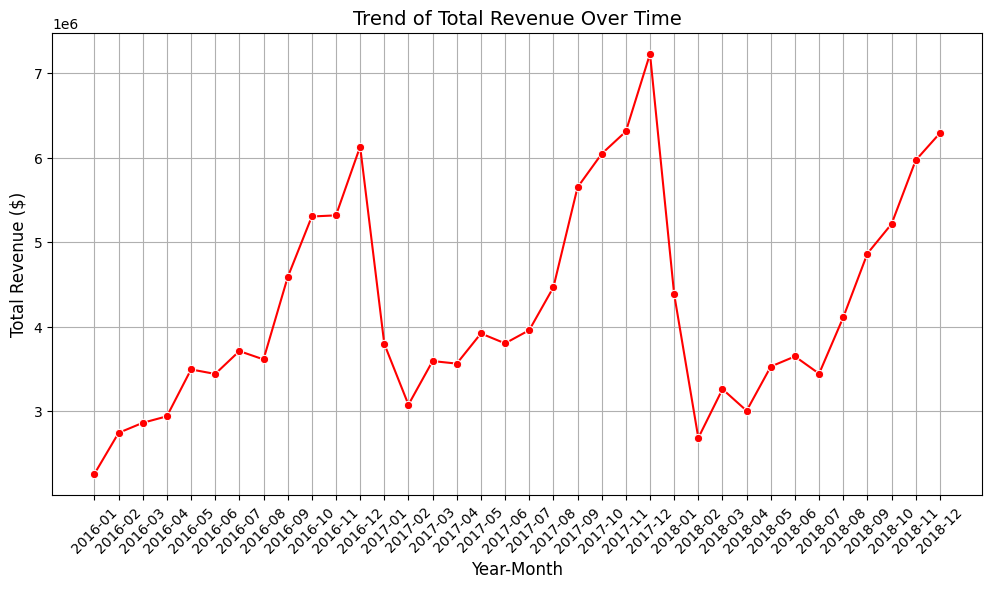

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Plot revenue over time
sns.lineplot(data=revenue_trend, x="YearMonth", y="Total_Revenue", marker="o", color="red")

# Improve visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Trend of Total Revenue Over Time", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

### Hypothesis Results & Recommendations

#### Hypothesis 1: Which cab company dominates the most cities?
- In the Analyis we found that the Yellow Cab dominates more major US cities then the Pink Cab, so it we will assume that it has more market share as well
#### Hypothesis 2: Which cab company has the most Market Share in the country
- In the Analysis for this hypothesis we found that Yellow Cab has 82% of the marketshare in the country and about triple the amount of rides ordered
#### Hypothesis 3: How does cab company revenue vary with time
- In the Analysis for this hypothesis we found that the revune is very cyclical, but is currently on an upwards trajectory, so now would be a good time to invest in them.
#### Final Recommendations
- Based on the analysis, XYZ should invest in Yellow Cab
- Supporting reasons:
  1. Has a larger presence in more Major US cities
  2. Has higher Country Marketshare so it would have a better return on investment in the long run
  3. cab companies in general are on an upwards trajectory so its a good time to invest in them